In [1]:
using DifferentialEquations
using PyCall
# pygui(:qt)
using PyPlot
# pygui(true)
using BSON: @save, @load
using ProgressMeter
include("leap_frog_definitions.jl")
include("PSS_Definitions_Dimer_X.jl")
include("orbit_plots_leapfrog_dimer.jl")
include("forward_one.jl")
include("back_one.jl")
H=.25
height=10
width=2.5
n_iter_P=10000
n_iter_Q=5000;

In [2]:
ArrP = range(-height, stop = height, length = n_iter_P)
ArrQ = range(-width, stop = width, length = n_iter_Q)
mesh_P=[P for P in ArrP, Q in ArrQ]
mesh_Q=[Q for P in ArrP, Q in ArrQ]
mesh = [(Q, P) for Q in ArrQ, P in ArrP];
M,N=size(mesh_Q)
Z1=zeros(M,N)
Z2=zeros(M,N)
for m in 1:M
    for n in 1:N
        P1_min=P1_poly_min(mesh_Q[m,n], mesh_P[m,n], H)
        P1_max=P1_poly_max(mesh_Q[m,n], mesh_P[m,n], H)
        if !isempty(P1_min)
            Z1[m,n]=P1_min
            Z2[m,n]=P1_max
        else
            Z1[m,n]=NaN
            Z2[m,n]=NaN
        end
    end
end


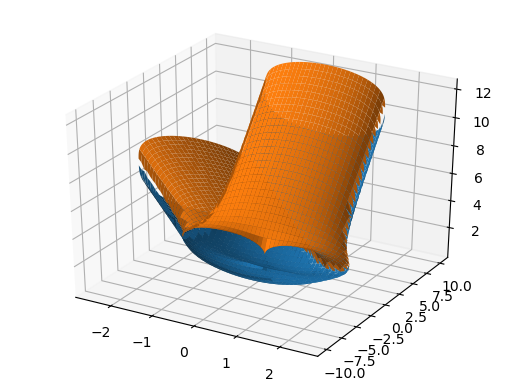

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f9631529160>

In [3]:
figure(dpi=500)
figure()
plot_surface(mesh_Q,mesh_P,Z1)
plot_surface(mesh_Q,mesh_P,Z2)